In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
fname = r'N:\Singlem\singlem19-1\March\29_20nmCrimson_NV\STED775PowerStability\cap2015_03_01_20_32_23_0.csv'
STED775 = np.genfromtxt(fname, delimiter = ';', skip_header = 2, usecols = [0,1])
wdir = r'N:\Singlem\singlem19-2\April\09_Power_measurements_NV'
fname = r'Exc561_10%.csv'
exc561_10pct = np.genfromtxt(os.path.join(wdir,fname), delimiter = ';', skip_header = 2, usecols = [0,1])
fname = r'Exc561_100%.csv'
exc561_100pct = np.genfromtxt(os.path.join(wdir,fname), delimiter = ';', skip_header = 2, usecols = [0,1])
fname = r'Exc640_10%.csv'
exc640_10pct = np.genfromtxt(os.path.join(wdir,fname), delimiter = ';', skip_header = 2, usecols = [0,1])
fname = r'Exc640_100%.csv'
exc640_100pct = np.genfromtxt(os.path.join(wdir,fname), delimiter = ';', skip_header = 2, usecols = [0,1])

In [73]:
def moving_average(a, n=3) :
    ret = np.cumsum(a)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
def gauss(median, sigma, x):
    return np.exp ( - (median - x)**2 / (2 * sigma**2)) / (np.sqrt(2*np.pi)*sigma)
def time_average(dat, sigma = 100):
    """1st column in dat is time in milliseconds. Second row is measured power. 
    Sigma is the width in ms of the gaussian averaging window"""
    avg = np.zeros(dat.shape[0])
    for i, el in enumerate(dat):
        weights = gauss(el[0], sigma, dat[:,0])
        avg[i] = np.sum(dat[:,1] * weights)
    return avg
        
        
    

In [84]:
def plotdata(dat, start = 0, stop = -1, navg = 50):
    _dat = moving_average(dat[:,1],navg)
    plt.plot(dat[start:stop,0],_dat[start:stop], '.-')
    plt.show()
    fftdat = moving_average(abs(np.fft.fft(dat[:,1])),10)
    plt.plot(np.log(abs(fftdat))[100:-100])
    plt.show()

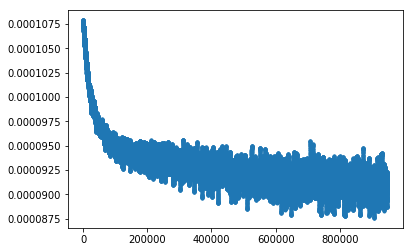

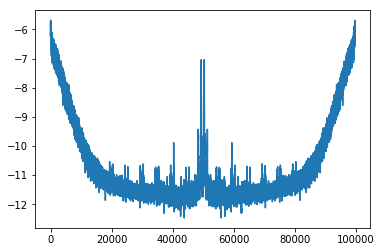

In [156]:
start = 0
stop = 95000
navg = 20
plotdata(exc640_100pct, start, stop, navg)

In [158]:
dat = exc640_100pct[20000:]
print('mean is :' + str(np.mean(dat[:,1])))
print('standard deviation is: ' + str(np.std(dat[:,1]) / np.mean(dat[:,1])*100))

mean is :9.201008929089363e-05
standard deviation is: 1.5522521256637865


In [18]:
fftdat = moving_average(abs(np.fft.fft(dat[:,1])),10)

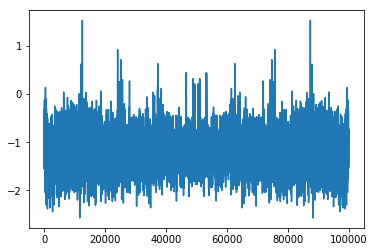

In [19]:
plt.plot(np.log(abs(fftdat))[100:-100])